In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from pydataset import data

### Answer with the type of test you would use (assume normal distribution):
- Is there a difference in grades of students on the second floor compared to grades of all students?
- Are adults who drink milk taller than adults who dont drink milk?
- Is the the price of gas higher in texas or in new mexico?
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?


> #### Is there a difference in grades of students on the second floor compared to grades of all students?

Steps: 
- Create Hypothesis
- Look for normalization (assumed normal)
- Determine sample
- Determine tails/directionality

##### H$_0$
- students grades on the secons floor == all student grades

##### H$_a$
- students grades on the second floor != all student grades

##### Sample:
- 1 sample 

##### Tails/Directionality
- two tails, no directionality, only eqaulity or difference
    
 Answer: I would se stats.ttest_1samp

> #### Are adults who drink milk taller than adults who dont drink milk?

Steps:
- Create hypothesis
- Look for normalizaiton (assumed normal)
- Determine number of samples
- Determine tails/directionality

##### H$_0$
- adults who drink milk height <= adults who DON'T drink milk

##### H$_a$
- adults who drink milk height > adults who DON'T drink milk

##### Sample
- 2 samples: adults who drink milk, and adults who dont drink milk are both samples of a larger population of ___

##### Tails/Directionaltiy
- 1 tail: We are looking for directionality, we want to test the null hypothesis to see if the adults who don't drink mile are equal height or greater height than adults who drink milk

##### Test:
- I think a stats.ttest_ind would be the correct test()
- this test would first need to determin the variance of the two variables
- In the test, I would be sure to make sure the arguements are int eh correct order with the one being tested as larger first
- If the p_value/2 is less than alpha then there is confidence in the result, we divide the p_vslue by two becasue we want to test for the directionailty

> #### Is the the price of gas higher in texas or in new mexico?

Steps:
- Create Hypothesis
- Look for normality(assumed normal)
- Detemine number of samples
- Determine tails/directionality

##### H$_0$
- tx gas > nm gas

##### H$_a$
- tx gas <= nm gas

##### Sample
- 2 samples, the samples are avg gas prices from two different states - the population may be gas prices int he country

##### Tails/Directionality
- 1 tail, it is directional. We want to know which is higher

##### Test:
- I would test for variance with the levene first
- Test stats.ttest_ind(tx_gas, nm_gas, equal_var=True)
    - (p_val/2) < alpha and t.test > 0 then we cannot reject the null 
    - (p_val/2) < alpha and t.test =< 0 then we can reject the null

> #### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

Step:
- Hypotheses
- Normality? (assume normal)
- Determine Sample
- Determine Tail
- Determine Tests

##### H$_0$
- stress levels
    - ds == wd
    - ds == ca
    - wd == ca

##### H$_a$
- Stress levels:
    - ds != wd
    - ds != ca
    - wd != ca

##### Sample
- Each one has 2 samples so we will look for independence/exclusivity

##### Tails/Directionality
- 2 tails - no directionality, looking for equality

##### Test
- Because 2 samples, check variance
- If independent, stats.ttest_ind(arg1, arg1, equal_var=?) 
    - position of args do not matter 
- p < alpha then reject null
- p > alpha then cannot reject null



### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Steps
- Hypothesis
- Look for normailty
- Determine samples
- Detrmine tails

#### Hypothesis 
>##### H$_0$
>- office 1 home sell time == office 2 home sell time

>##### H$_a$
>- office 1 home sell time != office 2 home sell time

#### Normalized?

In [173]:
# Office 1
μ_one = 90 # days
σ_one = 15

office_one_dist = stats.norm(μ_one, σ_one)

In [181]:
# Creating a set of random variables that correspond with the mean and stddev
office_one_dist.rvs(40)

array([ 81.38744519, 108.44582716,  91.38403858,  95.11794544,
        97.55160668,  86.78491936,  94.49876954,  83.71621789,
        86.98318708,  69.85506513, 122.11677655,  74.37927664,
        83.81714059, 105.41069908,  93.04263406, 105.52545323,
        99.22355167,  73.75851278,  74.38818157, 108.4178814 ,
        99.79005658,  81.42606096,  87.61576354,  89.39140792,
       106.92254224,  73.39488224,  83.81244726,  78.8016166 ,
        67.62181829,  96.48183848,  87.48194476,  99.93654476,
        75.69973429,  66.40962999,  67.1945697 ,  82.39483195,
        84.99231692,  92.79385512,  72.96997251,  99.07576554])

In [182]:
# plotting the random values in a hist to look for normality

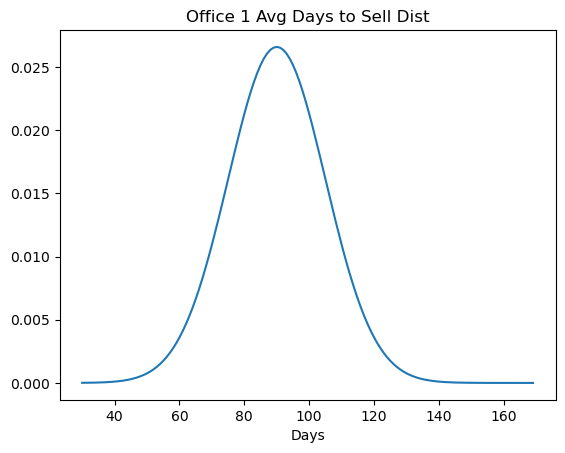

In [189]:
# plotting office 1
x = np.arange(30, 170)
y = [office_one_dist.pdf(i) for i in x]

plt.plot(x, y)
plt.title('Office 1 Avg Days to Sell Dist')
plt.xlabel('Days')
plt.show;

In [165]:
# Office 2
μ_two = 100 # days
σ_two = 20

office_two_dist = stats.norm(μ_two, σ_two)

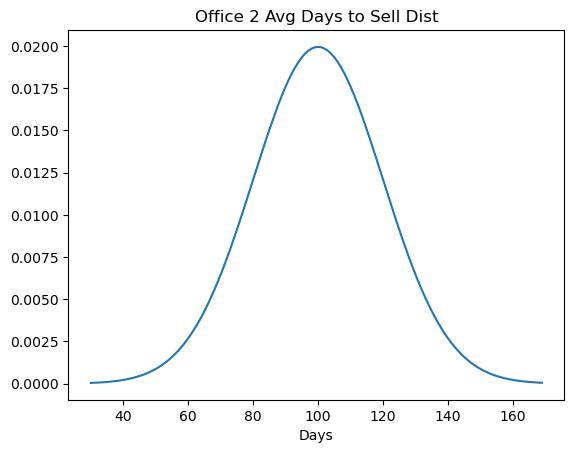

In [188]:
# plotting
x = np.arange(30, 170)
y2 = [office_two_dist.pdf(i) for i in x]

plt.plot(x, y2)
plt.title('Office 2 Avg Days to Sell Dist')
plt.xlabel('Days')
plt.show;

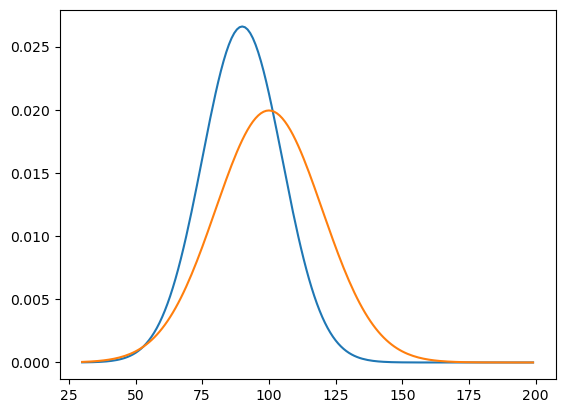

In [196]:
# third plotting type
x = np.arange(30, 200)
y = [office_one_dist.pdf(i) for i in x]
y2 = [office_two_dist.pdf(i) for i in x]

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [31]:
# both are normal, we may continue with the ttest without making adjustments

#### Sample
- There are 2 samples, with two samples we need to check for exclusivity
    - I am going to assumed exclusivity because of we havent learned how to determine exclusivity yet
    - ttest_ind
- But, I believe we must test the covariance on these two to see if they are not equal

In [ ]:
# Null is that the covariance is the same
# Alt is that the covariance is different

#### Tails/Directionality
- There is not directionality becasue we are looking for difference and equality, therefore when testing for the p-value, we only need to have it be less than alpha

In [199]:
# set α
α = 0.05

# Begin the ttest
t_stats, p_val = stats.ttest_ind_from_stats(μ_one, σ_two, 40, μ_two, σ_two, 50)

In [200]:
# testing the p_val
p_val < α, t_stats

(True, -2.3570226039551585)

We reject the null hypothesis!

## Load the mpg dataset and use it to answer the following questions:
- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [201]:
# loading mpg into 'mpg'
mpg = data('mpg')

In [202]:
# St alpha
α = 0.05

> ### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

#### Hypothesis:
>##### H$_0$
    2008 fuel efficiency == 1999 fuel efficiency
   
> ##### H$_a$
    2008 fuel efficiency != 1999 fuel efficiency

In [49]:
# check data
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [108]:
# There are two mileages, must take the averag of bothe and create a new columne with the average
mpg['fl_effcncy'] = mpg[['cty','hwy']].mean(axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fl_effcncy
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [80]:
# Isolating each 2008 cars and 1999 cars and placing into individual variables
mpg_ninetynine = mpg[mpg.year == 1999].fl_effcncy
# mpg_ninetynine

In [79]:
mpg_oeight = mpg[mpg.year == 2008].fl_effcncy
# mpg_oeight

#### Normalized?

creating charts to check for normalization starting with 1999 cars

setting mu and sigma
μ_ninetynine, σ_ninetynine = mpg_ninetynine.mean(), mpg_ninetynine.std()
μ_ninetynine, σ_ninetynine

creating the distributions
mpg_ninetynine_dist = stats.norm(μ_ninetynine, σ_ninetynine)

creating graph
x = np.arange(1, 40)
y = [mpg_ninetynine_dist/pdf(i) for i in x]

plt.plot(x, y)
plt.title('Fuel Efficiency of Cars From 1999 Dist')
plt.xlabel('MPG')
plt.show()

(array([32., 13., 12., 38., 12.,  5.,  2.,  0.,  1.,  2.]),
 array([13.  , 15.65, 18.3 , 20.95, 23.6 , 26.25, 28.9 , 31.55, 34.2 ,
        36.85, 39.5 ]),
 <BarContainer object of 10 artists>)

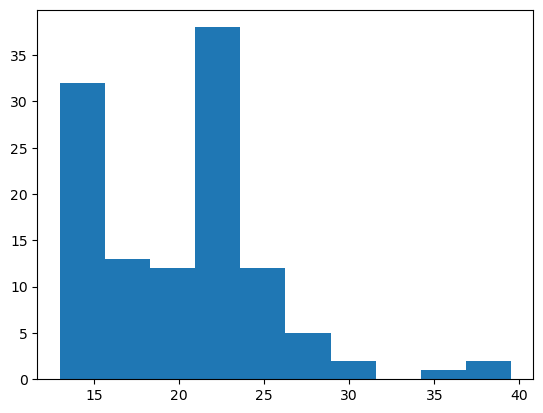

In [87]:
plt.hist(mpg_ninetynine)

(array([ 7.,  5., 32.,  4., 19., 22., 15.,  8.,  2.,  3.]),
 array([10.5, 12.7, 14.9, 17.1, 19.3, 21.5, 23.7, 25.9, 28.1, 30.3, 32.5]),
 <BarContainer object of 10 artists>)

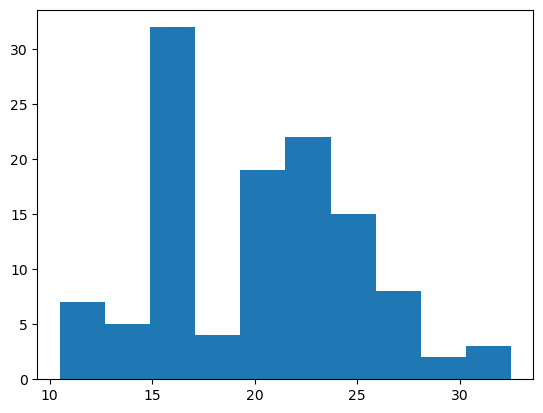

In [90]:
plt.hist(mpg_oeight)

# They dont look normal to meeeee

#### Sample
- There are two samples, are they independent? not sure
    - but lets check for the variance within to determine if they have equal variance


In [94]:
# Sub-Null: the two variables have equal variance
# Sub-Alt: the two variables have unequal variance

stats.levene(mpg_ninetynine, mpg_oeight)[1] < α

### We fail reject the null hypothesis, so we will assume that they have the same variance

False

#### Tails/directionality
- 2 tails, becasue we are not looking for directionality

In [96]:
# Finding the t statistic and pvalue
t_stats, p_val = stats.ttest_ind(mpg_ninetynine, mpg_oeight, equal_var=True)

In [99]:
# checking for confidence
p_val < α

# we cannot confidently reject the null hypothesis

False

> ### Are compact cars more fuel-efficient than the average car?

In [117]:
# create variable for compact car fuel
compact_fuel = mpg[mpg['class'] == 'compact'].fl_effcncy
# compact_fuel

In [116]:
# create a variable for all car fuel effeciency
avg_car_fuel = mpg.fl_effcncy
avg_car_fuel

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: fl_effcncy, Length: 234, dtype: float64

#### Hypothesis:

>##### H$_0$:
    compact cars fuel efficiency <= avg car fuel efficiency

>##### H$_a$:
    compact car fuel efficiency > avg car fuel efficiency

####  Normal?

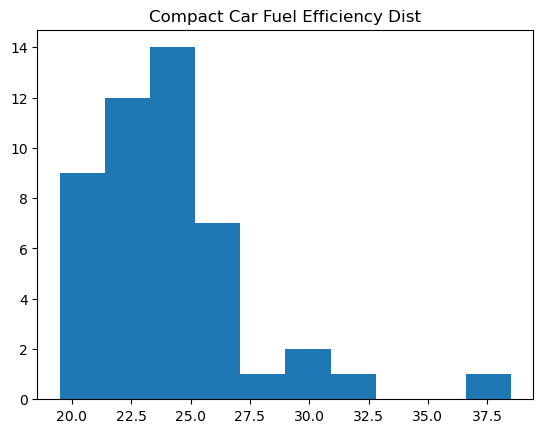

In [119]:
plt.hist(compact_fuel)
plt.title('Compact Car Fuel Efficiency Dist')
plt.show()

# Appears to be right skewed

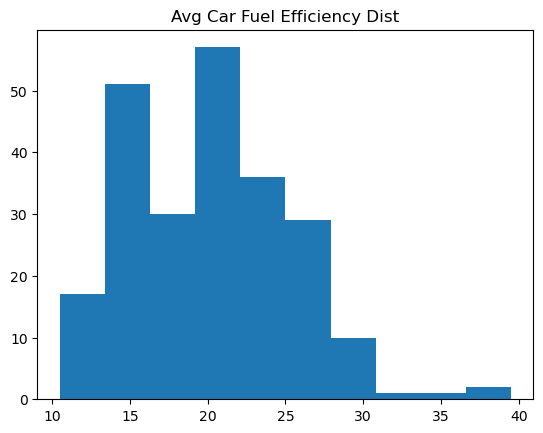

In [122]:
plt.hist(avg_car)
plt.title('Avg Car Fuel Efficiency Dist')
plt.show()

# relatively normal

#### Determine Sample
- 1 sample, this means we will use the stats.ttest_1samp to find our t stat and pvalue
    - no need to look for variance comparison
- with the one sample test we need to create a theoretical mean

#### Determine Tails/Directionality
- 1 tail, we are looking for directionality
    - for the testing of the null, the avg car fuel efficiency will come first in the test

In [203]:
# Create the theoretical mean
μth = avg_car_fuel.mean()
# Creating the test
t_stat, p_val = stats.ttest_1samp(compact_fuel, μth)

In [137]:
# testing the p_value and the t_stat
(p_val / 2) < α, t_stats > 0

(True, True)

In [138]:
# Both are true so we can reject the null hypothesis

> ### Do manual cars get better gas mileage than automatic cars?

In [145]:
# Setting the variable for the auto transmission 
auto_trans_mpg = mpg[mpg.trans.str.startswith('auto')].fl_effcncy

In [148]:
# Variable for man trans mpg
man_trans_mpg = mpg[mpg.trans.str.startswith('man')].fl_effcncy

#### Hypothesis

>##### H$_0$
    man trans gas mileage <= auto trans gas mileage

> ##### H$_a$
    man tran gas mileage > autotrans gas mileage

#### Normal? 

(array([ 6., 35., 27., 20., 35., 18.,  9.,  4.,  2.,  1.]),
 array([10.5 , 12.95, 15.4 , 17.85, 20.3 , 22.75, 25.2 , 27.65, 30.1 ,
        32.55, 35.  ]),
 <BarContainer object of 10 artists>)

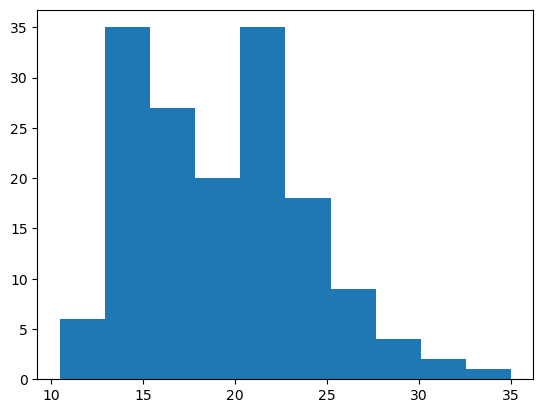

In [150]:
plt.hist(auto_trans_mpg)

(array([ 1., 10.,  8., 22., 10., 19.,  4.,  1.,  0.,  2.]),
 array([10.5, 13.4, 16.3, 19.2, 22.1, 25. , 27.9, 30.8, 33.7, 36.6, 39.5]),
 <BarContainer object of 10 artists>)

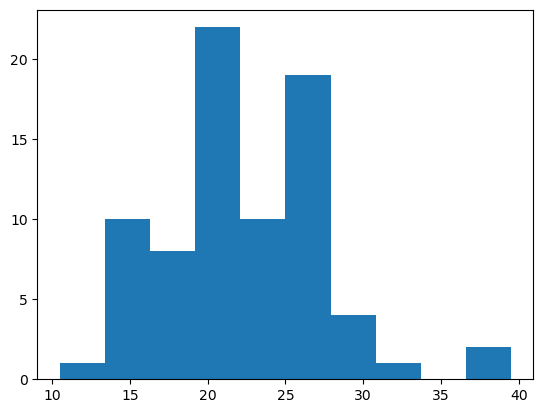

In [152]:
plt.hist(man_trans_mpg)

#### Detemine Sampling
- 2 samples, will use ttest_ind()
    - What about variiance? Lets see

In [154]:
# SubNull: the varince is the same for both
# SubAlt: the variance is different

stats.levene(auto_trans_mpg, man_trans_mpg)[0] < α

# we cannot reject the null, will assume the variance is the same

False

#### Determine Tails/Directionality
- 1 tail becasue looking for greater than or equal to
    - position arguments correctly
    - pvalue / 2
  

In [211]:
# Setup the test
t_stats, p_val = stats.ttest_ind(auto_trans_mpg, man_trans_mpg, equal_var=True)

In [213]:
(p_val/2 < α) and t_stat > 0

True

# Correlation Exercises

In [4]:
# searborn for correlation viz
import seaborn as sns

### Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?
    - Pearsons R Correlation: These are two continuous variables: length of feet and length of arms
- Do guys and gals quit their jobs at the same rate?
    - T-Test: There is a continous variable(rate of job quitting) across two categories (gender split into two categories)
- Does the length of time of the lecture correlate with a students grade?
    - Pearsons r Correlation: Two continuous variables (length of the lecture and a student grade - assuming a number grade)

### Use the telco_churn data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

In [65]:
# importing data
telco = pd.read_csv('/Users/aaron/codeup-data-science/statistics-exercises/telco_churn.csv')

In [162]:
# looking at the data head
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [166]:
# Create a dataframe with columns of interes questions
telco_filtered = telco[['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService', 'PhoneService']]
telco_filtered.dtypes

tenure               int64
MonthlyCharges     float64
TotalCharges        object
InternetService     object
PhoneService        object
dtype: object

In [239]:
# editing the object total charges
telco_filtered_dropped = telco_filtered[telco_filtered.TotalCharges != ' ']

telco_filtered_dropped['TotalCharges'] = telco_filtered_dropped.TotalCharges.astype(float)
total_charges = telco_filtered_dropped.TotalCharges.astype(float)

/var/folders/fj/7fbysvvn7956npcj9d4mxfxw0000gn/T/ipykernel_9871/4181341294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco_filtered_dropped['TotalCharges'] = telco_filtered_dropped.TotalCharges.astype(float)


In [178]:
# establishing needed variables to answer questions
# question 1
tenure = telco_filtered_dropped.tenure
monthly_charges = telco_filtered_dropped.MonthlyCharges

((7032,), (7032,))

In [191]:
#Question 2: tenure and total charges
total_charges = telco_filtered_dropped.TotalCharge

In [180]:
# Controls with phone and internetservices
phone_service = telco_filtered_dropped.PhoneService
internet_service_type = telco_filtered_dropped.InternetService

>#### Hypothesis 1:
>>##### H$_0$ There is no linear relationship between tenure and monthly charges
>>##### H$_a$ There is a linear relaitonship between tenure and monthly charges

In [182]:
# Establish the confidence level
α = 0.05

In [183]:
# running pearsons r
r, p = stats.pearsonr(tenure, monthly_charges)

In [184]:
# checking p-value for against alpha
if p < α:
    print(f'We can reject the null hypothesis. There pearson\'s r is {r}')

We can reject the null hypothesis. There pearson's r is 0.24686176664089593


>#### Hypothesis 2:
>>##### H$_0$ There is no linear relationship between tenure and total charges
>>##### H$_a$ There is a linear relaitonship between tenure and total charges

In [235]:
# running pearsons r
r, p = stats.pearsonr(tenure, total_charges)
# total_charges = total_charges.astype(float)

In [236]:
# checking p-value for against alpha
if p < α:
    print(f'We can reject the null hypothesis. There pearson\'s r is {r}')

We can reject the null hypothesis. There pearson's r is 0.8258804609332093


>#### Hypothesis 1/2 with controls:
>> Control for phoneservice and internet service

In [207]:
# !pip install pingouin
import pingouin as pg

In [208]:
telco_filtered_dropped['PhoneService']

0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7032, dtype: object

In [240]:
# Phone Service
telco_ps = telco_filtered_dropped[telco_filtered_dropped['PhoneService'] == 'Yes']
telco_no_ps = telco_filtered_dropped[telco_filtered_dropped['PhoneService'] != 'Yes']

In [249]:
stats.pearsonr(telco_ps.tenure, telco_ps.MonthlyCharges)

PearsonRResult(statistic=0.24419396575193408, pvalue=6.82801603760159e-87)

In [248]:
stats.pearsonr(telco_no_ps.tenure, telco_no_ps.MonthlyCharges)

PearsonRResult(statistic=0.5924298640568981, pvalue=1.1732739032893169e-65)

In [245]:
telco_no_is = telco_filtered_dropped[telco_filtered_dropped['InternetService'] == 'No']
telco_dsl_is = telco_filtered_dropped[telco_filtered_dropped['InternetService'] == 'DSL']
telco_fo_is = telco_filtered_dropped[telco_filtered_dropped['InternetService'] == 'Fiber optic']

In [250]:
stats.pearsonr(telco_no_is.tenure, telco_no_is.MonthlyCharges)

PearsonRResult(statistic=0.34618773548574794, pvalue=4.89660459994806e-44)

In [252]:
stats.pearsonr(telco_dsl_is.tenure, telco_dsl_is.MonthlyCharges)

PearsonRResult(statistic=0.5197012004433115, pvalue=2.8895185791337738e-167)

In [253]:
stats.pearsonr(telco_fo_is.tenure, telco_fo_is.MonthlyCharges)

PearsonRResult(statistic=0.6246206176175604, pvalue=0.0)

### Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [29]:
# importing env file
import env

In [32]:
# load data from sql
# employee_df = pd.read_sql('''SELECT 
#   t.emp_no,
#   DATEDIFF(now(), e.hire_date) AS ndays_employed,
#   count(title) AS title_count,
#   max(s.salary) AS current_salary
# FROM employees e
#   JOIN titles t ON e.emp_no = t.emp_no
#   JOIN salaries s ON s.emp_no  = e.emp_no
# WHERE s.to_date > now()
# GROUP BY t.emp_no;''', env.get_db_url('employees'))

In [130]:
employee_df.shape

(240124, 4)

In [136]:
employee_df.head()

,emp_no,ndays_employed,title_count,current_salary
0,10001,13403,1,88958
1,10002,13620,1,72527
2,10003,13340,1,43311
3,10004,13245,2,74057
4,10005,12229,2,94692


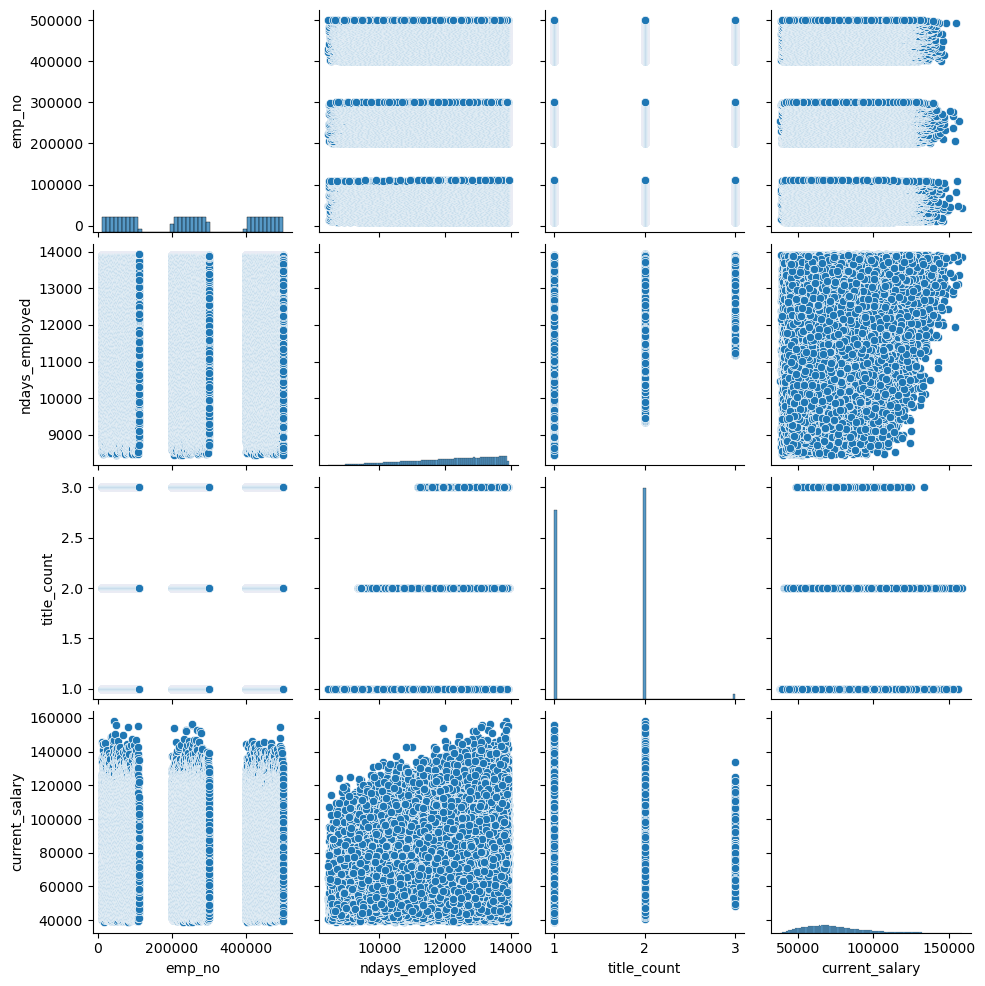

In [138]:
sns.pairplot(employee_df)
plt.show();

>#### Hypothesis 1:
>>##### H$_0$ There is no linear relationship between time with company and total salary
>>##### H$_a$ There is a linear relaitonship between time with company and total salary

In [134]:
stats.pearsonr(employee_df.ndays_employed, employee_df.current_salary)

PearsonRResult(statistic=0.3064625613186014, pvalue=0.0)

>#### Hypothesis 2:
>>##### H$_0$ There is no linear relationship between time with company and total titles held
>>##### H$_a$ There is a linear relaitonship between time with company and total titles held

In [135]:
stats.pearsonr(employee_df.ndays_employed, employee_df.title_count)

PearsonRResult(statistic=0.2871267889704734, pvalue=0.0)

### Use the sleepstudy data.
- Is there a relationship between days and reaction time?

In [141]:
sleep_study = data('sleepstudy')

>#### Hypothesis:
>>##### H$_0$ There is no linear relationship between days and reaction time
>>##### H$_a$ There is a linear relaitonship between days and reaction time

In [144]:
sleep_study.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [146]:
stats.pearsonr(sleep_study.Reaction, sleep_study.Days)

PearsonRResult(statistic=0.5352302262650255, pvalue=9.89409632221439e-15)

# χ$^2$ Test

### Answer with the type of stats test you would use (assume normal distribution):

- Do students get better test grades if they have a rubber duck on their desk?
    - Means testing - T-Test
- Does smoking affect when or not someone has lung cancer?
    - chi-squared
- Is gender independent of a person’s blood type?
    - chi-squared
- A farming company wants to know if a new fertilizer has improved crop yield or not
    - means testing, t-test
- Does the length of time of the lecture correlate with a students grade?
    - correaltion, pearsons r
- Do people with dogs live in apartments more than people with cats?
    - means testing - t-test

### Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

        Codeup Student	Not Codeup Student
- Uses a Macbook	49	20
- Doesn't Use A Macbook	1	30

>#### Hypothesis:
>>##### H$_0$ There is no relationship/dependency betweenusing a macbook and and being a student at codeup
>>##### H$_a$ There is a relationship/dependency betweenusing a macbook and and being a student at codeup

In [260]:
observed = np.array([[49, 20], [1, 30]])

In [262]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [264]:
p<α # There is a relationship

True

### Choose another 2 categorical variables from the mpg dataset and perform a chi^2 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [267]:
mpg = data('mpg')

In [270]:
# oserving the datatypes to identify cat variables
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [285]:
# I tihnk I will go with compact cars and models to see if there is a dependency/rekatioshhip
mpg['is_compact'] = (mpg['class'] == 'compact').astype(int)
mpg['is_four_wheel_drv'] = (mpg['drv'] == '4')

>#### Hypothesis:
>>##### H$_0$ There is no relationship/dependency between compact cars and having 4 wheel drive
>>##### H$_a$ There is a relationship/dependency between compact cars and having 4 wheel drive

In [288]:
# creating observerd table
observed = pd.crosstab(mpg.is_four_wheel_drv, mpg.is_compact)

In [291]:
# running observed table throuh chi2 contingency
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [293]:
p < α

True

In [297]:
pd.DataFrame(expected)

,0,1
0,104.688034,26.311966
1,82.311966,20.688034


### Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?


In [300]:
emp_gender = pd.read_sql('''SELECT 
  e.gender,
  dept_name,
  (CASE WHEN de.emp_no IN (SELECT emp_no FROM dept_manager) THEN 1 ELSE 0 END) is_manager
FROM dept_emp de
  JOIN departments d ON de.dept_no = d.dept_no
  JOIN employees e ON de.emp_no = e.emp_no
WHERE to_date > now();''', env.get_db_url('employees'))

>#### Hypothesis:
>>##### H$_0$ There is no relationship/dependency between employees gender and being in marketing or sales
>>##### H$_a$ There is a relationship/dependency between employees gender and being in marketing or sales

In [302]:
emp_gender.head()

,gender,dept_name,is_manager
0,M,Customer Service,0
1,F,Customer Service,0
2,M,Customer Service,0
3,F,Customer Service,0
4,F,Customer Service,0


In [312]:
# isolating marketing and sales  employees
only_mark_sales = emp_gender[emp_gender.dept_name.isin(['Marketing', 'Sales'])]

In [315]:
# creating cross tab to prep for chi2 contigency
observed = pd.crosstab(only_mark_sales.gender, only_mark_sales.dept_name)

In [318]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [320]:
# We cannot reject the null
p < α

False

>#### Hypothesis:
>>##### H$_0$ There is no relationship/dependency between employees gender and being a manager
>>##### H$_a$ There is a relationship/dependency between employees gender and being a manager

In [324]:
# prepping data
observed = pd.crosstab(emp_gender.gender, emp_gender.is_manager)

In [327]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [329]:
# we cannot reject the null
p < α

False